In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [11]:
sleep_data = pd.read_csv('Updated_sleep.csv')
volumes_data = pd.read_csv('Volumes_Merge_new_regions.csv')

In [19]:
VISCODE = {
        0: "bl", 1: "m06", 2: "m12", 3: "m24"}

In [20]:
sleep_data['VISCODE'] = sleep_data['VISCODE'].map(VISCODE)

In [6]:
volumes_data 

,RightEntorhinal,RightTemporalPole,RightParahippocampal,RightInferiorTemporal,RightMiddleTemporal,RightFusiform,RightInferiorParietal,RightIsthmusCingulate,RightBankssts,RightPrecuneus,...,MHPSYCH,MH2NEURL,MH4CARD,MH5RESP,MH19OTHR,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
0,1183.0,1159.0,1994.0,8612.0,9311.0,7010.0,11950.0,2168.0,2893.0,8089.0,...,0,0,1,0,0,-1.187,-0.674,-1.221,-1.638,-0.670
1,834.0,1350.0,1776.0,7542.0,9736.0,7624.0,11785.0,2002.0,2750.0,7580.0,...,0,0,1,0,0,-0.914,-0.969,-0.548,-1.837,-1.034
2,545.0,1279.0,1701.0,7534.0,9316.0,7264.0,11152.0,2129.0,2770.0,7697.0,...,0,0,1,0,0,-1.369,-1.511,0.739,-1.700,-1.605
3,985.0,1341.0,1881.0,8355.0,10387.0,8005.0,11917.0,2204.0,2887.0,8112.0,...,0,0,1,0,0,-1.021,-1.144,-0.880,-1.368,-1.062
4,1907.0,1913.0,2105.0,9535.0,11501.0,12024.0,14271.0,2040.0,2374.0,9163.0,...,0,0,0,0,0,0.535,0.218,0.739,-0.129,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1723.0,2112.0,1621.0,10043.0,11010.0,6160.0,12228.0,1816.0,1718.0,7148.0,...,1,0,1,0,0,-0.531,-0.101,-0.080,-1.045,0.153
2097,1574.0,2117.0,2007.0,9070.0,12815.0,8297.0,13912.0,2144.0,2229.0,7920.0,...,0,0,1,1,0,-1.445,-1.642,-1.813,-1.640,-1.788
2098,1739.0,2208.0,2007.0,8904.0,12154.0,8450.0,13366.0,2116.0,2148.0,8087.0,...,0,0,1,1,0,-1.764,-1.625,-0.656,-0.946,-2.047
2099,1694.0,2227.0,2200.0,8571.0,12525.0,8511.0,13866.0,2086.0,2390.0,7989.0,...,0,0,1,1,0,-1.826,-2.384,-2.184,-1.818,-2.661


In [21]:
merged_data = pd.merge(sleep_data, volumes_data, on=[
                       'RID', 'VISCODE'])

In [61]:
sleep_vars = ['NPIK', 'NPIKSEV', 'Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

mri_outcomes = [col for col in merged_data.columns if col.startswith(
    ('Left', 'Right', 'Corpus', 'Brainstem', 'Csf', 'Icv', 'Fourth', 'NonWMH', 'Third', 'WMH', 'Optic'))]
print(mri_outcomes)

['RightEntorhinal', 'RightTemporalPole', 'RightParahippocampal', 'RightInferiorTemporal', 'RightMiddleTemporal', 'RightFusiform', 'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts', 'RightPrecuneus', 'RightHippocampus', 'RightAmygdala', 'RightAccumbensArea', 'RightMedialOrbitofrontal', 'RightPallidum', 'RightCaudalMiddleFrontal', 'RightPutamen', 'RightRostralAnteriorCingulate', 'RightParacentral', 'RightPrecentral', 'RightLingual', 'LeftEntorhinal', 'LeftHippocampus', 'LeftFusiform', 'LeftMiddleTemporal', 'LeftParacentral', 'RightInferiorLateralVentricle', 'LeftInferiorLateralVentricle', 'RightLateralVentricle', 'LeftLateralVentricle', 'Icv']


In [62]:
psychometric_vars = ['ADNI_MEM', 'ADNI_EF', 'ADNI_VS', 'ADNI_LAN', 'ADNI_EF2']
sociodemo_outcomes = ['Adjusted_Age', 'PTGENDER', 'PTEDUCAT',
                      'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4','MHPSYCH','MH2NEURL','MH4CARD','MH5RESP','MH19OTHR']

In [63]:
target_groups = {
    'MRI': mri_outcomes,
    'Psychometric': psychometric_vars,
    'Sociodemographic': sociodemo_outcomes
}

In [64]:
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr


def perform_granger_causality(df, var1, var2, max_lag=3):
    """
    Perform Granger Causality Test to assess bidirectional relationship.
    Returns p-values for Granger causality in both directions.
    """
    try:
        data = df[[var1, var2]].dropna()
        result_1 = grangercausalitytests(data, max_lag)
        p_val_1 = result_1[1][0]['ssr_ftest'][1]

        result_2 = grangercausalitytests(
            data[[var2, var1]].dropna(), max_lag)
        p_val_2 = result_2[1][0]['ssr_ftest'][1]

        return p_val_1, p_val_2
    except Exception as e:
        return np.nan, np.nan

In [65]:
def calculate_correlation(df, var1, var2):
    """
    Calculate Pearson correlation between two variables.
    Convert non-numeric columns to numeric before correlation.
    """
    corr_df = df[[var1, var2]].dropna()

    corr_df[var1] = pd.to_numeric(corr_df[var1], errors='coerce')
    corr_df[var2] = pd.to_numeric(corr_df[var2], errors='coerce')

    corr_df = corr_df.dropna()

    if not corr_df.empty and len(corr_df) > 1:
        corr_value, p_value = pearsonr(corr_df[var1], corr_df[var2])
        return corr_value, p_value
    else:
        return np.nan, np.nan

In [66]:
cn_data = merged_data[merged_data['DX_bl'] == 'CN']
mci_data = merged_data[merged_data['DX_bl'] == 'LMCI']
ad_data = merged_data[merged_data['DX_bl'] == 'AD']

In [67]:
cn_data = cn_data.sort_values(by=['RID', 'VISCODE'])
mci_data = mci_data.sort_values(by=['RID', 'VISCODE'])
ad_data = ad_data.sort_values(by=['RID', 'VISCODE'])

In [68]:
print(f"CN Data Shape: {cn_data.shape}")
print(f"MCI Data Shape: {mci_data.shape}")
print(f"AD Data Shape: {ad_data.shape}")

CN Data Shape: (717, 60)
MCI Data Shape: (959, 60)
AD Data Shape: (425, 60)


In [69]:
group_data = {
    'CN': cn_data,
    'MCI': mci_data,
    'AD': ad_data
}

In [70]:
results_list = []
for group_name, group_df in group_data.items():
    print(f"Analyzing {group_name} Group...")

    for sleep_var in sleep_vars:
        for outcome in mri_outcomes + psychometric_vars + sociodemo_outcomes:
            p_val_1, p_val_2 = perform_granger_causality(
                group_df, sleep_var, outcome)

            corr_value, corr_p_value = calculate_correlation(
                group_df, sleep_var, outcome)

            results_list.append({
                'Group': group_name,
                'Sleep_Variable': sleep_var,
                'Outcome': outcome,
                'Metric': 'Correlation',
                'Value': corr_value,
                'p_value': corr_p_value
            })

            results_list.append({
                'Group': group_name,
                'Sleep_Variable': sleep_var,
                'Outcome': outcome,
                'Metric': 'Sleep_to_Outcome',
                'Value': p_val_1,
                'p_value': p_val_1
            })

            results_list.append({
                'Group': group_name,
                'Sleep_Variable': sleep_var,
                'Outcome': outcome,
                'Metric': 'Outcome_to_Sleep',
                'Value': p_val_2,
                'p_value': p_val_2
            })

Analyzing CN Group...

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4882  , p=0.4850  , df_denom=713, df_num=1
ssr based chi2 test:   chi2=0.4902  , p=0.4838  , df=1
likelihood ratio test: chi2=0.4900  , p=0.4839  , df=1
parameter F test:         F=0.4882  , p=0.4850  , df_denom=713, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4739  , p=0.6228  , df_denom=710, df_num=2
ssr based chi2 test:   chi2=0.9545  , p=0.6205  , df=2
likelihood ratio test: chi2=0.9539  , p=0.6207  , df=2
parameter F test:         F=0.4739  , p=0.6228  , df_denom=710, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2951  , p=0.8290  , df_denom=707, df_num=3
ssr based chi2 test:   chi2=0.8939  , p=0.8269  , df=3
likelihood ratio test: chi2=0.8934  , p=0.8270  , df=3
parameter F test:         F=0.2951  , p=0.8290  , df_denom=707, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         

c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_

ssr based chi2 test:   chi2=2.8824  , p=0.2366  , df=2
likelihood ratio test: chi2=2.8780  , p=0.2372  , df=2
parameter F test:         F=1.4337  , p=0.2389  , df_denom=952, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8030  , p=0.4923  , df_denom=949, df_num=3
ssr based chi2 test:   chi2=2.4266  , p=0.4887  , df=3
likelihood ratio test: chi2=2.4236  , p=0.4893  , df=3
parameter F test:         F=0.8030  , p=0.4923  , df_denom=949, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7791  , p=0.1826  , df_denom=955, df_num=1
ssr based chi2 test:   chi2=1.7847  , p=0.1816  , df=1
likelihood ratio test: chi2=1.7831  , p=0.1818  , df=1
parameter F test:         F=1.7791  , p=0.1826  , df_denom=955, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5999  , p=0.0277  , df_denom=952, df_num=2
ssr based chi2 test:   chi2=7.2376  , p=0.0268  , df=2
likelihood ratio test: chi2=7.2104  , p

In [80]:
import seaborn as sns


def plot_group_correlation_matrix(results_df, group_name, max_sleep=8, max_outcome=8):
    group_df = results_df[
        (results_df['Group'] == group_name) &
        (results_df['Metric'] == 'Correlation')
    ]

    pivot = group_df.pivot_table(
        index='Sleep_Variable', columns='Outcome', values='Value')
    abs_corr = pivot.abs()

    top_sleep_vars = abs_corr.mean(axis=1).sort_values(
        ascending=False).head(max_sleep).index
    top_outcomes = abs_corr.mean(axis=0).sort_values(
        ascending=False).head(max_outcome).index

    filtered = pivot.loc[top_sleep_vars, top_outcomes]

    plt.figure(figsize=(12, 6))
    sns.heatmap(filtered, annot=True, fmt='.2f',
                cmap='coolwarm', center=0, cbar=True)
    plt.title(f'Correlation Matrix - {group_name} Group')
    plt.xlabel('Outcome Variables')
    plt.ylabel('Sleep Variables')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [72]:
mri_outcomes = list(mri_outcomes)
psychometric_outcomes = list(psychometric_vars)
sociodemographic_outcomes = list(
    sociodemo_outcomes)

In [73]:
results_df = pd.DataFrame(results_list)

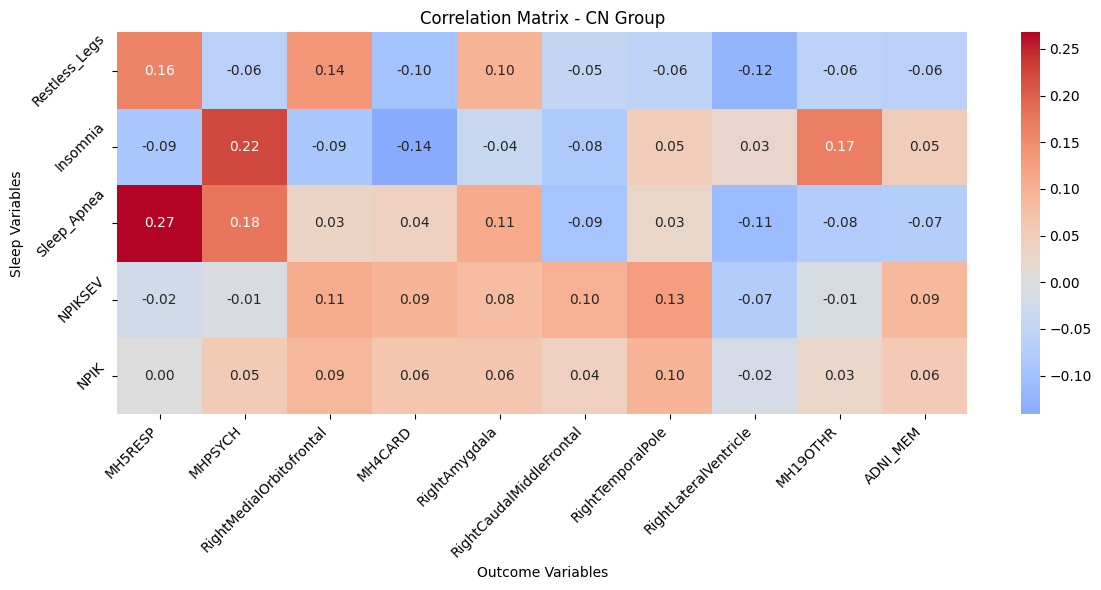

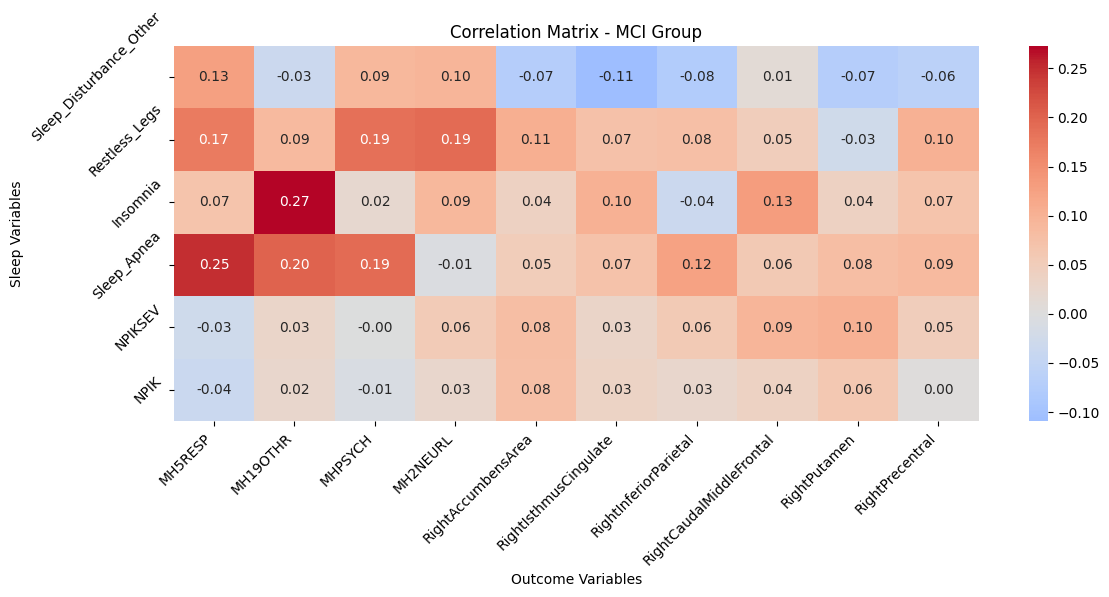

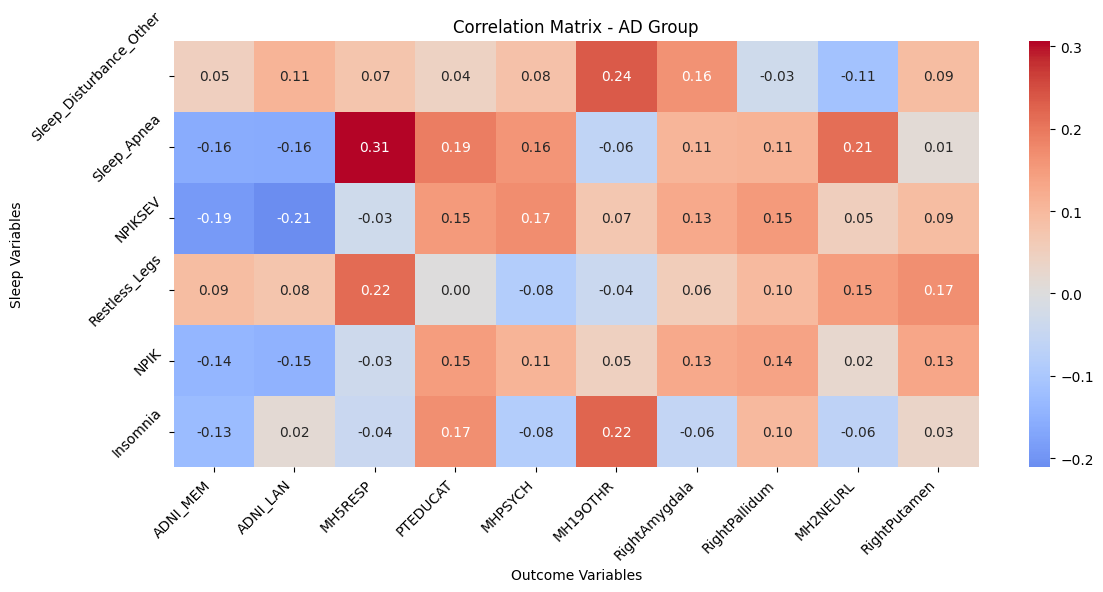

In [81]:
for group in group_data.keys():
    plot_group_correlation_matrix(
        results_df, group_name=group, max_sleep=8, max_outcome=10)

In [88]:
def plot_bidirectional_causality(results_df, group_name, max_sleep=6, max_outcome=6):
    df_s2o = results_df[
        (results_df['Group'] == group_name) &
        (results_df['Metric'] == 'Sleep_to_Outcome')
    ]
    df_o2s = results_df[
        (results_df['Group'] == group_name) &
        (results_df['Metric'] == 'Outcome_to_Sleep')
    ]

    mat_s2o = -np.log10(df_s2o.pivot_table(index='Sleep_Variable',
                        columns='Outcome', values='Value') + 1e-10)
    mat_o2s = -np.log10(df_o2s.pivot_table(index='Sleep_Variable',
                        columns='Outcome', values='Value') + 1e-10)

    top_sleeps = mat_s2o.mean(axis=1).add(mat_o2s.mean(
        axis=1), fill_value=0).sort_values(ascending=False).head(max_sleep).index
    top_outcomes = mat_s2o.mean().add(mat_o2s.mean(), fill_value=0).sort_values(
        ascending=False).head(max_outcome).index

    s2o_filtered = mat_s2o.loc[top_sleeps, top_outcomes]
    o2s_filtered = mat_o2s.loc[top_sleeps, top_outcomes]

    p_s2o = df_s2o.pivot_table(index='Sleep_Variable', columns='Outcome', values='Value')
    p_o2s = df_o2s.pivot_table(index='Sleep_Variable', columns='Outcome', values='Value')
    p_s2o = p_s2o.loc[top_sleeps, top_outcomes]
    p_o2s = p_o2s.loc[top_sleeps, top_outcomes]

    sleep_asterisks = []
    for sleep in top_sleeps:
        mask = (p_s2o.loc[sleep] < 0.05) | (p_o2s.loc[sleep] < 0.05)
        sleep_asterisks.append("*" if mask.any() else "")
    sleep_labels = [f"{s}{a}" for s, a in zip(top_sleeps, sleep_asterisks)]

    outcome_asterisks = []
    for outcome in top_outcomes:
        mask = (p_s2o[outcome] < 0.05) | (p_o2s[outcome] < 0.05)
        outcome_asterisks.append("*" if mask.any() else "")
    outcome_labels = [f"{o}{a}" for o, a in zip(top_outcomes, outcome_asterisks)]

    annotations = s2o_filtered.copy()
    for i in range(s2o_filtered.shape[0]):
        for j in range(s2o_filtered.shape[1]):
            val1 = s2o_filtered.iloc[i, j]
            val2 = o2s_filtered.iloc[i, j]
            annotations.iloc[i, j] = f"{val1:.1f}\n{val2:.1f}"

    plt.figure(figsize=(12, 6))
    sns.heatmap(s2o_filtered, annot=annotations, fmt='',
                cmap='viridis', cbar_kws={'label': '-log10(p)'})
    plt.title(f'Bidirectional Granger Causality - {group_name}')
    plt.xlabel('Outcome Variables')
    plt.ylabel('Sleep Variables')
    plt.xticks(np.arange(len(outcome_labels)) + 0.5, outcome_labels, rotation=45, ha='right')
    plt.yticks(np.arange(len(sleep_labels)) + 0.5, sleep_labels, rotation=45)
    plt.tight_layout()
    plt.figtext(0.99, 0.01, "* indicates p < 0.05", ha='right', va='bottom', fontsize=10, color='black')
    plt.show()

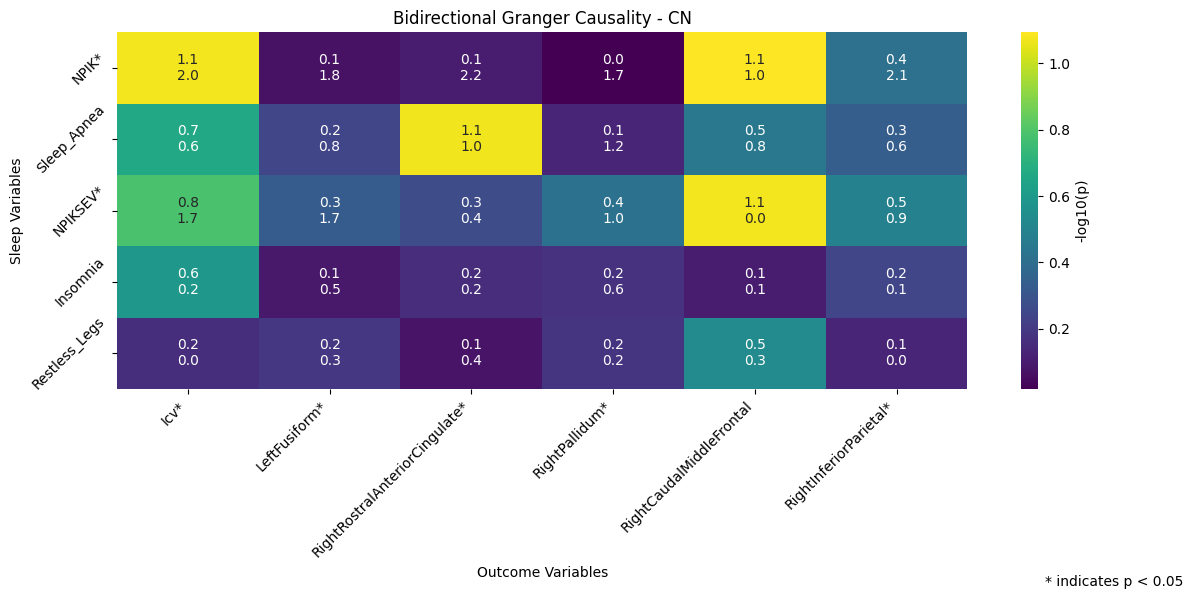

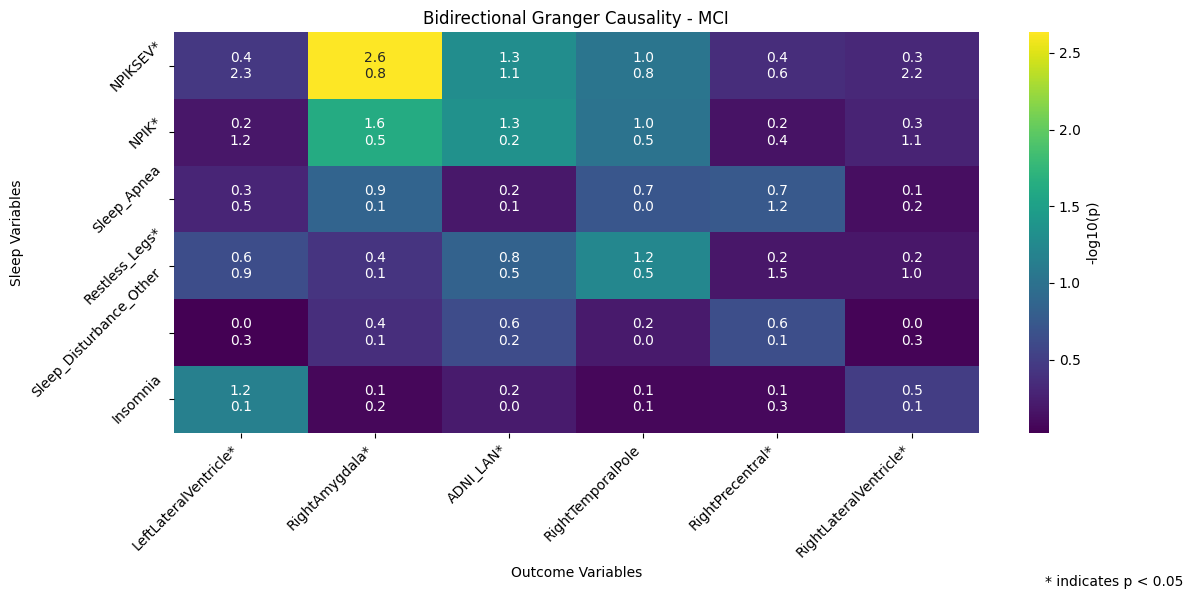

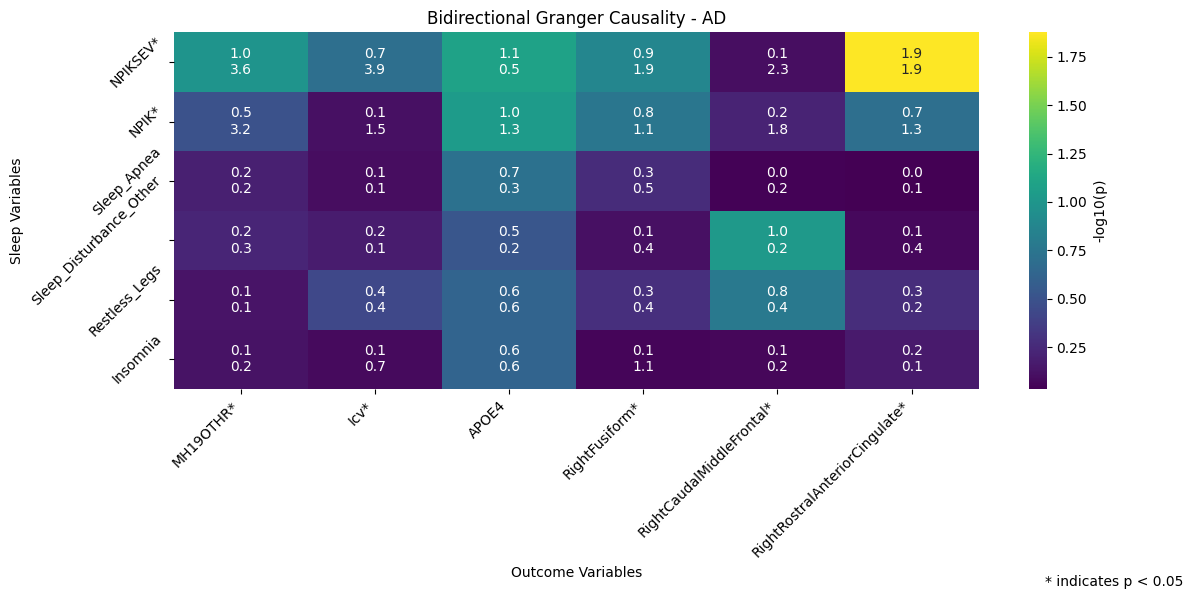

In [89]:
for group in group_data.keys():
    plot_bidirectional_causality(results_df, group_name=group)